In [1]:
import os
import pandas as pd
import git
import matplotlib.pyplot as plt
folder = "../../data/format-corpus"
relative_path = '../../data/format-corpus'
repo = git.Git(folder)

In [2]:
import folderstats

df = folderstats.folderstats(folder, ignore_hidden=True,hash_name="sha256")
df = df[df.folder==False]
df

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,sha256
0,4,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_ft_HeatherRyan,jpg,1620612,2022-03-24 09:29:09,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,9d89cc0347adeb5141e4feea3d411b0fd2252c63145e1c...
1,5,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,indd,1503232,2022-03-24 09:29:09,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,8f206d618c0161cfddf4c18aa3932ed99d9e500bf1260c...
2,6,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,pdf,59106,2022-03-24 09:29:09,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,6a3c9444d4905c8896a717be7c30ee7d20b3c319eb2d3d...
3,7,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_README_HeatherRyan.md,rtf,1232,2022-03-24 09:29:09,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,3ef3b90e7bf9e863d1ae9f862eaa5e1cd87e8f9ef67438...
6,11,../../data/format-corpus\disk-images\fat12\opf...,blank-untitled-volume,img,1474560,2022-03-24 09:29:10,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,3,10,0,039713487932afa67bd3c024e4d6284aac5548092d8b9b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1759,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p24,mov,6518304,2022-03-24 09:29:10,2022-03-22 11:00:27,2022-03-22 11:00:27,False,NaN,2,1701,0,82f1477829488ed45f688744dc1a2cac111468b21158d2...
1756,1760,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p25,mov,6251203,2022-03-24 09:29:10,2022-03-22 11:00:27,2022-03-22 11:00:27,False,NaN,2,1701,0,2a064a262bfa7377803185db0331b15f77d2a7dce98043...
1757,1761,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p30,mov,5215055,2022-03-24 09:29:10,2022-03-22 11:00:27,2022-03-22 11:00:27,False,NaN,2,1701,0,718a57ef016c80e0d75b08ba595b51961d1013173e5902...
1758,1762,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p50,mov,3125967,2022-03-24 09:29:10,2022-03-22 11:00:27,2022-03-22 11:00:27,False,NaN,2,1701,0,69405cbb8cfded9d6244eff13955564e8c5ad54fe1c745...


<AxesSubplot:>

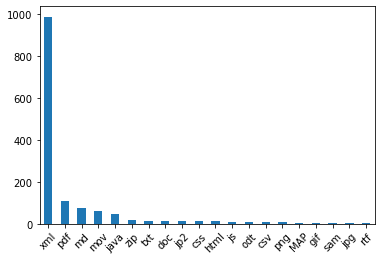

In [3]:
df.extension.value_counts()[:20].plot.bar(rot=45)

In [4]:
df.extension.value_counts()

xml      986
pdf      106
md        74
mov       61
java      47
        ... 
sha1       1
123        1
opml       1
nmind      1
rft        1
Name: extension, Length: 90, dtype: int64

In [5]:
df.loc[df["extension"]=="pdf"]

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,sha256
2,6,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,pdf,59106,2022-03-24 09:29:09,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,3,0,6a3c9444d4905c8896a717be7c30ee7d20b3c319eb2d3d...
43,47,../../data/format-corpus\ebooks\calibre 0.8.57...,Lorem Ipsum - Andrew Jackson,pdf,41814,2022-03-24 09:29:10,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,37,0,de27b8feda2ab31df801c4894732389a5255f39a1c6a97...
61,65,../../data/format-corpus\ebooks\calibre 0.9.0\...,lorem-ipsum,pdf,43433,2022-03-24 09:29:10,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,55,0,ed5f14efaada2cb0eb76cc3529e08859667b2319adb38c...
71,75,../../data/format-corpus\ebooks\iBooks Author ...,lorem-ipsum-openprintcopypw,pdf,32582,2022-03-24 09:29:10,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,74,0,964ef0fed1d9757e6b06f6197503b3e06223435d1a943e...
72,76,../../data/format-corpus\ebooks\iBooks Author ...,lorem-ipsum-plus-image-openprintcopypw,pdf,66644,2022-03-24 09:29:10,2022-03-22 11:00:24,2022-03-22 11:00:24,False,NaN,2,74,0,5133a751297b9bff66cff73caa9bf26b29859bc6e13f6d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,1570,../../data/format-corpus\tools\fidget\src\test...,999999,pdf,9400,2022-03-24 09:29:10,2022-03-22 11:00:26,2022-03-22 11:00:26,False,NaN,11,1566,0,2607e41c9ce385785c7768085ad181a6db858bbfa9c1a2...
1655,1661,../../data/format-corpus\variations\variations...,lorem-ipsum-pages-09-4.1-923,pdf,23142,2022-03-24 09:29:10,2022-03-22 11:00:26,2022-03-22 11:00:26,False,NaN,4,1660,0,3679a9b9af012f0c353825737252991a052376a502571d...
1657,1663,../../data/format-corpus\variations\variations...,lorem-ipsum.oo3.2.export-pdfa,pdf,36972,2022-03-24 09:29:10,2022-03-22 11:00:26,2022-03-22 11:00:26,False,NaN,4,1660,0,2df43480ffc930cd0ab78227df923d2390bcd1b42c602b...
1658,1664,../../data/format-corpus\variations\variations...,lorem-ipsum.oo3.2.export,pdf,27489,2022-03-24 09:29:10,2022-03-22 11:00:26,2022-03-22 11:00:26,False,NaN,4,1660,0,426f7e1d1156e50b53512e58289dd83730b700019c2f5e...


In [6]:

N = df.shape[0]
df = df[["path","name","extension","size","sha256"]]
df["changes"] = df.apply(lambda row: len(repo.log("--oneline",os.path.relpath(row.path, relative_path)).splitlines()) - 1 ,axis=1)
df

C:\Users\User\AppData\Local\Temp/ipykernel_34544/637073210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["changes"] = df.apply(lambda row: len(repo.log("--oneline",os.path.relpath(row.path, relative_path)).splitlines()) - 1 ,axis=1)


,path,name,extension,size,sha256,changes
0,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_ft_HeatherRyan,jpg,1620612,9d89cc0347adeb5141e4feea3d411b0fd2252c63145e1c...,0
1,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,indd,1503232,8f206d618c0161cfddf4c18aa3932ed99d9e500bf1260c...,0
2,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_HeatherRyan,pdf,59106,6a3c9444d4905c8896a717be7c30ee7d20b3c319eb2d3d...,0
3,../../data/format-corpus\desktop-publishing\In...,Neddy_Flyer_README_HeatherRyan.md,rtf,1232,3ef3b90e7bf9e863d1ae9f862eaa5e1cd87e8f9ef67438...,0
6,../../data/format-corpus\disk-images\fat12\opf...,blank-untitled-volume,img,1474560,039713487932afa67bd3c024e4d6284aac5548092d8b9b...,0
...,...,...,...,...,...,...
1755,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p24,mov,6518304,82f1477829488ed45f688744dc1a2cac111468b21158d2...,0
1756,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p25,mov,6251203,2a064a262bfa7377803185db0331b15f77d2a7dce98043...,0
1757,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p30,mov,5215055,718a57ef016c80e0d75b08ba595b51961d1013173e5902...,0
1758,../../data/format-corpus\video\Quicktime\xdcam...,xdcam-hd422-720p50,mov,3125967,69405cbb8cfded9d6244eff13955564e8c5ad54fe1c745...,0


In [7]:
s1 = df["extension"].value_counts().rename("N")
s2 = df.loc[df["changes"]>0].groupby(["extension"])["changes"].count().rename("positives")
df_ = pd.concat([s1, s2], axis=1)
df_["positives"] = df_["positives"].fillna(0)
df_

,N,positives
xml,986,432.0
pdf,106,2.0
md,74,17.0
mov,61,0.0
java,47,39.0
...,...,...
sha1,1,0.0
123,1,0.0
opml,1,0.0
nmind,1,0.0


In [8]:
df_["p"] = df_.apply(lambda row: row.positives/row.N,axis=1).clip(upper=1)
df_ = df_.sort_values(by=["N"],ascending=False)
df_[:20]

,N,positives,p
xml,986,432.0,0.438134
pdf,106,2.0,0.018868
md,74,17.0,0.229730
mov,61,0.0,0.000000
java,47,39.0,0.829787
zip,17,0.0,0.000000
txt,14,2.0,0.142857
doc,13,0.0,0.000000
jp2,12,0.0,0.000000
css,11,4.0,0.363636


In [42]:
import numpy as np
import math

def expected_operations(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return np.ceil(number_of_pools + number_of_positive_pools*k)

def expected_writes(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    return number_of_pools

def expected_scrubbing(N,k,p):
    if(k==0.0):
        k=N
    number_of_pools = np.ceil(N/k)
    number_of_positive_pools = (1 - np.power((1-p),k))* number_of_pools
    return np.ceil(number_of_positive_pools*k)

def optimal_pool_size(N,p):
    if(p<=0.0):
        return N
    return np.ceil(1.24*np.power(p,-0.466))

df_["k"] = df_.apply(lambda row: optimal_pool_size(row.N,row.p),axis=1)
df_["operations"] = df_.apply(lambda row: expected_operations(row.N,row.k,row.p),axis=1)
df_["operations_naive"] = df_.apply(lambda row: expected_operations(row.N,1,row.p),axis=1)
df_["efficiency"] = df_.apply(lambda row: row.operations_naive/row.operations,axis=1)
df_["writes"] = df_.apply(lambda row: expected_writes(row.N,row.k,row.p),axis=1)
df_["scrubbing"] = df_.apply(lambda row: expected_scrubbing(row.N,row.k,row.p),axis=1)
df_["net_operations_per_object"] = df_.apply(lambda row: row.operations/row.N,axis=1)
df_["net_operations_per_object_naive"] = df_.apply(lambda row: row.operations_naive/row.N,axis=1)
df_[:15]

,N,positives,p,k,operations,operations_naive,efficiency,writes,scrubbing,net_operations_per_object,net_operations_per_object_naive
xml,986,432.0,0.438134,2.0,1168.0,1418.0,1.214041,493.0,675.0,1.184584,1.438134
pdf,106,2.0,0.018868,8.0,30.0,108.0,3.600000,14.0,16.0,0.283019,1.018868
md,74,17.0,0.229730,3.0,66.0,91.0,1.378788,25.0,41.0,0.891892,1.229730
mov,61,0.0,0.000000,61.0,1.0,61.0,61.000000,1.0,0.0,0.016393,1.000000
java,47,39.0,0.829787,2.0,71.0,86.0,1.211268,24.0,47.0,1.510638,1.829787
zip,17,0.0,0.000000,17.0,1.0,17.0,17.000000,1.0,0.0,0.058824,1.000000
txt,14,2.0,0.142857,4.0,12.0,16.0,1.333333,4.0,8.0,0.857143,1.142857
doc,13,0.0,0.000000,13.0,1.0,13.0,13.000000,1.0,0.0,0.076923,1.000000
jp2,12,0.0,0.000000,12.0,1.0,12.0,12.000000,1.0,0.0,0.083333,1.000000
css,11,4.0,0.363636,2.0,14.0,15.0,1.071429,6.0,8.0,1.272727,1.363636


<AxesSubplot:>

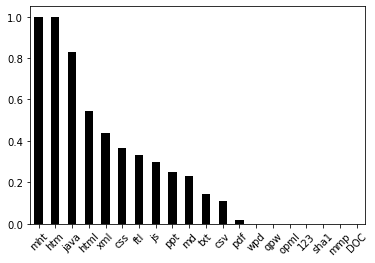

In [35]:
df_.sort_values(by=["p"],ascending=False)["p"][:20].plot.bar(rot=45,color="black")

In [41]:
df_["efficiency"].value_counts()

1.000000     37
2.000000     18
3.000000      9
5.000000      6
0.666667      2
4.000000      2
3.600000      1
0.833333      1
8.000000      1
9.000000      1
1.250000      1
1.214041      1
1.062500      1
1.071429      1
12.000000     1
13.000000     1
1.333333      1
17.000000     1
1.211268      1
61.000000     1
1.378788      1
1.083333      1
Name: efficiency, dtype: int64

<AxesSubplot:>

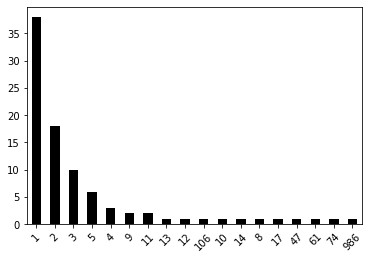

In [48]:
df_["N"].value_counts().plot.bar(rot=45,color="black")

In [19]:
df_["operations_naive"].sum()

2044.0

In [21]:
df_["operations"].sum()

1490.0

In [18]:
df_["operations_naive"].sum()/df_["operations"].sum()

1.3718120805369127

In [40]:
df_["efficiency"].median()

1.2320205479452055

In [12]:
df_["net_operations_per_object_naive"].mean()

1.0618101250992493

In [13]:
df_["net_operations_per_object"].mean()

0.7616483948469756

In [14]:
high_throughput = expected_operations(1560,optimal_pool_size(1560,df_["p"].mean()),df_["p"].mean())
high_throughput/N

0.4737179487179487

In [15]:
df_["p"].value_counts()

0.000000    77
1.000000     2
0.438134     1
0.018868     1
0.229730     1
0.829787     1
0.142857     1
0.363636     1
0.545455     1
0.300000     1
0.111111     1
0.250000     1
0.333333     1
Name: p, dtype: int64

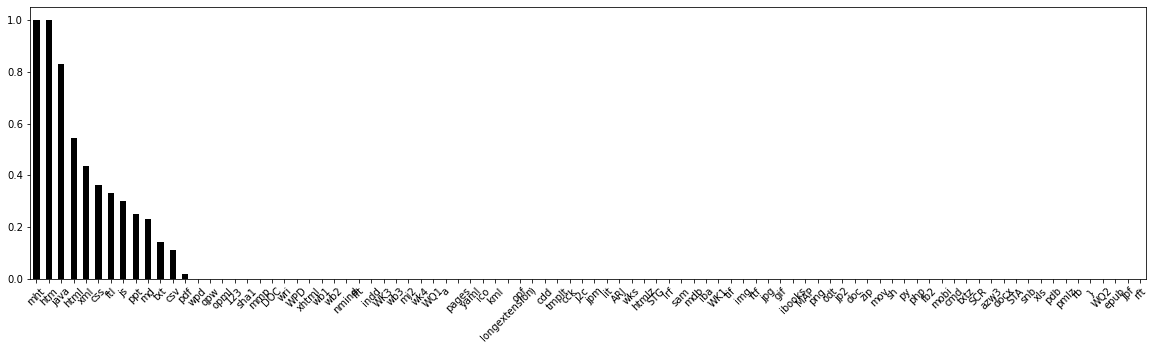

In [16]:
df_.sort_values(by=["p"],ascending=False)["p"].plot.bar(rot=45,figsize=(20, 5),color="black")
df_["p"].value_counts()
plt.xticks(fontsize=10)
plt.show()